# As I am a big Fan of Cricket so this notebook is written specifically to perform exploratory data analysis of the IPL dataset.


## Introduction

We have the Indian Premier League data from 2008 to 2017. We have two files to begin with. Matches - giving us details of each match played. Deliveries - all the deliveries in all the matches put together. We would work on these two files to extract data on each match, batsmen and bowlers.

The Indian Premier League (IPL), officially Vivo Indian Premier League for sponsorship reasons, is a professional Twenty20 cricket league in India contested during April and May of every year by teams representing Indian cities and some states. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league. IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of IPL in 2017 was US 5.3 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion (US

182 million) to the GDP of the Indian economy.

There have been eleven seasons of the IPL tournament. The current IPL title holders are the Chennai Super Kings, who won the 2018 season. The most successful franchises in the tournament are the Chennai Super Kings and Mumbai Indians with 3 tournament wins each.

-- source wikipedia


Data Source :https://www.kaggle.com/nowke9/ipldata

## Objective:
Given a dataset,we will do analysis on whole ipl , so we will get more information of this wonderful tournament.

In [100]:
#Import packages in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read data using panda

In [101]:

match_data= pd.read_csv('matches.csv')
print (match_data.shape)

deliveries_df = pd.read_csv('deliveries.csv')
print('Deliveries Data Dimensions: ', deliveries_df.shape)
match_data.head()

(636, 18)
Deliveries Data Dimensions:  (150460, 21)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [102]:
print ("==================== NULLS in DELIVERIES ====================")
print (deliveries_df.isnull().sum())
print ("==================== NULLS in MATCHES ====================")
print (match_data.isnull().sum())

==================== NULLS in DELIVERIES ====================
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64
==================== NULLS in MATCHES ====================
id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0


### Data summarry

In [103]:

print('Our data contain below informationwith different features and their type. \n')
print(match_data.info())
print('There are %d rows and %d columns in theIPL dataset.'%(match_data.shape[0],match_data.shape[1]))

Our data contain below informationwith different features and their type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 59.7+ KB
None
There are 636 rows and 18 columns in theIPL dataset.


### Lets see the mathsSummary

In [104]:

print('The mathematical summary is below: \n')
match_data.describe()

The mathematical summary is below: 



,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


### Lets see how many seasons has happened in ipl since inception of the league.

In [105]:

a=np.sort(match_data['season'].unique())
print(a)
print('{0} No seasons have been played in IPL.'.format(len(a)))

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
10 No seasons have been played in IPL.


### lets see Teams who participated in Ipl since inception

In [106]:

print('The teams which have participated since IPL first edition. \n')
b=np.sort(match_data['team1'].unique())
print(b)

The teams which have participated since IPL first edition. 

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiant' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


## Number of matches each season:

### Let us first look at the number of matches played per season.


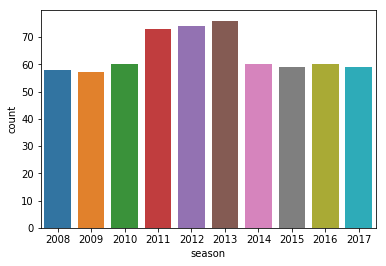

In [107]:
sns.countplot(x='season', data=match_data)
plt.show()

### Plot for Matches count at  every stadium

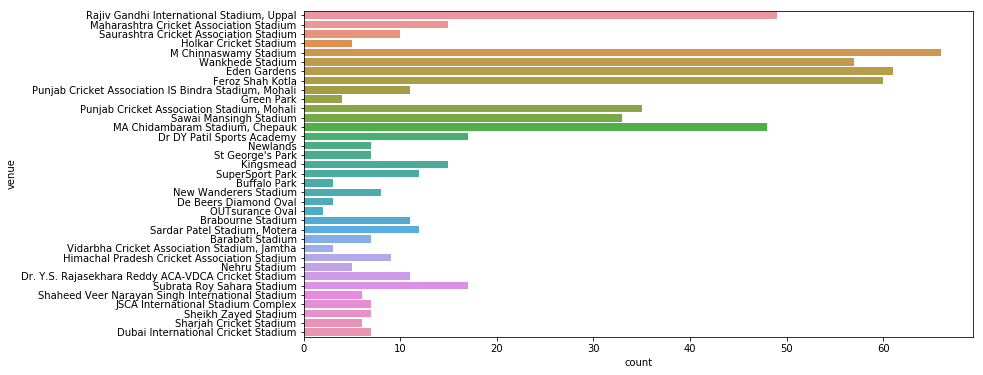

In [108]:

plt.figure(figsize=(12,6))
sns.countplot(y='venue', data=match_data)
plt.yticks(rotation='horizontal')
plt.show()

#### Result 
Bnagalore has the highest number of matches 

## number of matches won by a team 

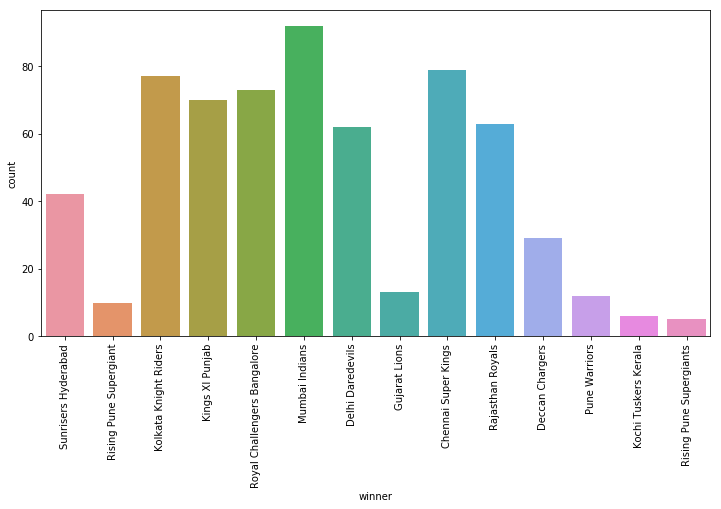

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner', data=match_data)
plt.xticks(rotation='vertical')
plt.show()

#### Result 
Its obvious CSK & MI won the most matches (because they have won 5 title combining )

## Lets merge two dataframe 

In [110]:
Two_df = pd.merge(match_data ,deliveries_df, left_on='id', right_on='match_id')
print (Two_df.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


## Display scores of each team in every season and see which teams scored the higest and lowest scores till date

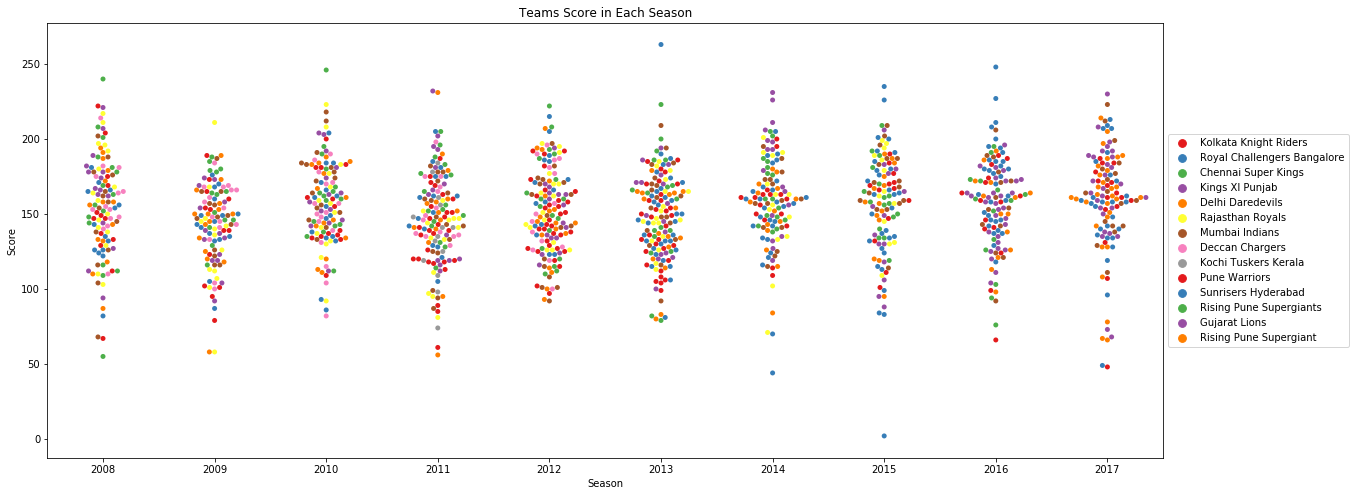

In [111]:
teams_score_per_season = Two_df.loc[: , ['season', 'match_id', 'batting_team', 'total_runs']]
teams_score_per_season = teams_score_per_season.groupby(['season', 'match_id', 'batting_team'])['total_runs'].agg(np.sum).reset_index()
#teams_score_per_season

plt.figure(figsize=(20, 8))
ax0 = plt.subplot(111)
g = sns.swarmplot(x='season', y='total_runs', hue='batting_team', data=teams_score_per_season, ax=ax0, palette='Set1')
g.set_title('Teams Score in Each Season')
g.set_xlabel('Season')
g.set_ylabel('Score')
ax0.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Lets see 10 top batsmen run getter in ipl 

In [112]:
batsman_score = Two_df.loc[:, ['batsman', 'total_runs']]
batsman_score = batsman_score.groupby(['batsman'])['total_runs'].agg(['sum', 'count']).reset_index().rename(columns={'sum' : 'total_runs' , 'count' : 'balls_count'})
batsman_score['strike_rate'] = np.divide(batsman_score['total_runs'], batsman_score['balls_count']) * 100

batsman_score.nlargest(10, ['total_runs'])


,batsman,total_runs,balls_count,strike_rate
374,SK Raina,4745,3369,140.842980
431,V Kohli,4588,3494,131.310819
137,G Gambhir,4388,3433,127.818235
323,RG Sharma,4334,3274,132.376298
103,DA Warner,4213,2902,145.175741
340,RV Uthappa,4004,2960,135.270270
85,CH Gayle,3914,2532,154.581359
347,S Dhawan,3754,3005,124.925125
259,MS Dhoni,3728,2680,139.104478
22,AB de Villiers,3621,2402,150.749376


#### Result:

1. SK Raina is the highest scorer

2. V Sehwag has the highest strike rate

## What is the average 'win_by_runs' for each team?

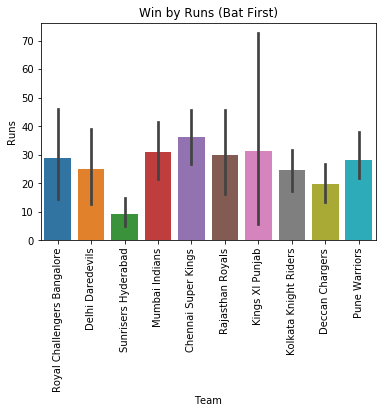

In [113]:
win_by = Two_df.loc[:, ['id', 'toss_winner','toss_decision', 'win_by_wickets', 'win_by_runs']]
win_by_runs = win_by[(win_by['toss_decision'] == 'bat') & (win_by['win_by_runs'] != 0)].loc[:, ['id', 'toss_winner', 'win_by_runs']].drop_duplicates()

g = sns.barplot(data=win_by_runs, x='toss_winner', y='win_by_runs')
g.set_xlabel('Team')
g.set_ylabel('Runs')
g.set_title('Win by Runs (Bat First)')
plt.xticks(rotation=90)
plt.show()

#### Result:

1. Sunrisers Hyderabad have the least win by runs average. Hence, they found it relatively hard to defend the score.

## Most Number of Man of the Matches Award

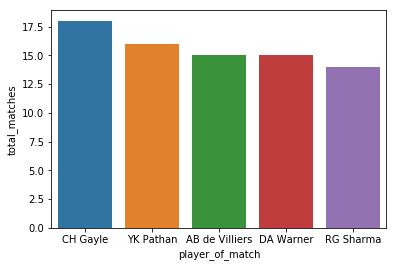

In [114]:
top_man_of_matches = Two_df.loc[:, ['match_id', 'player_of_match']].drop_duplicates()
top_man_of_matches = top_man_of_matches.groupby(['player_of_match'])['match_id'].count().nlargest(5).reset_index().rename(columns={'match_id' : 'total_matches'})
top_man_of_matches
sns.barplot(top_man_of_matches["player_of_match"],top_man_of_matches["total_matches"])


#### Universe Boss is the King - Christopher Henry Gayle

In [115]:
Batsman_Score_by_Match= deliveries_df[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_Match=Batsman_Score_by_Match.groupby(["match_id","batsman"]).sum()
Batsman_with_centuries=Batsman_Score_by_Match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries=Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
Batsman_with_centuries.columns=["batsman","No_of_centuries"]
Batsman_with_centuries

,batsman,No_of_centuries
0,CH Gayle,5
1,V Kohli,4
2,DA Warner,3
3,AB de Villiers,3
4,M Vijay,2
5,AC Gilchrist,2
6,V Sehwag,2
7,BB McCullum,2
8,HM Amla,2
9,SR Watson,2


## Toss decision:

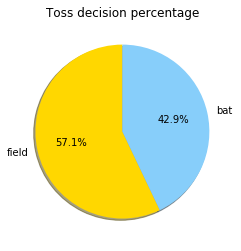

In [116]:


temp_series = match_data.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()
          



##### Almost 55% of the toss decisions are made to field first. Now let us see how this decision varied over time 

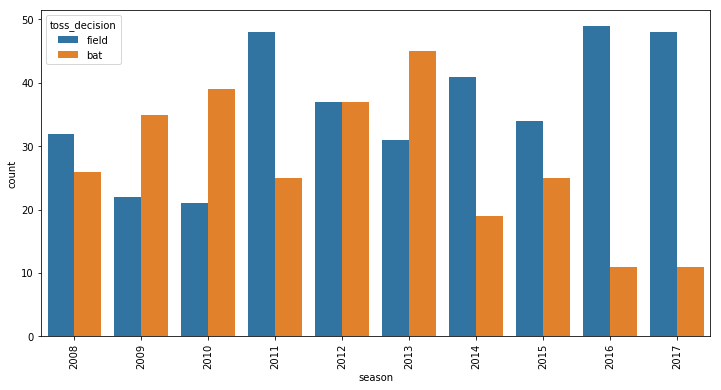

In [117]:


plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_data)
plt.xticks(rotation='vertical')
plt.show()



#### Since there is a very strong trend towards batting second let us see the win percentage of teams batting second 

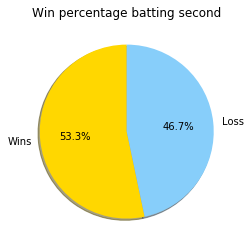

In [118]:
num_of_wins = (match_data.win_by_wickets>0).sum()
num_of_loss = (match_data.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

#### So percentage of times teams batting second has won is 53.2

#### How lucky are the toss winning teams?:

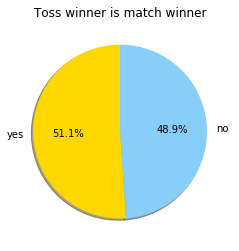

In [119]:


match_data['toss_winner_is_winner'] = 'no'
match_data['toss_winner_is_winner'].ix[match_data.toss_winner == match_data.winner] = 'yes'
temp_series = match_data.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss winner is match winner")
plt.show()



#### It is not really the case it seems. The chance is 50-50 for both the teams.